In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("hls", 8)
%matplotlib inline

In [2]:
train_data = pd.read_csv("./input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Shape of Train Data

In [3]:
train_data.shape

(891, 12)

## Description of Train Data

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Test Data

In [5]:
test_data = pd.read_csv("./input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Test Data Shape

In [6]:
test_data.shape

(418, 11)

## Test Data Describe

In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Percentage of women survived

In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


## Percentage of men survived

In [9]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## Percentage of Elder women survived

In [10]:
elder_women = train_data.loc[train_data.Sex == 'female']['Survived'][train_data.Age > 50]
rate_elder_women = sum(elder_women)/len(elder_women)
print("% of elder women survived: ", rate_elder_women)

% of elder women survived:  0.9411764705882353


## Percentage of Elder men survived

In [11]:
elder_men = train_data.loc[train_data.Sex == 'male']['Survived'][train_data.Age > 50]
rate_elder_men = sum(elder_men)/len(elder_men)
print("% of men survived: ", rate_elder_men)

% of men survived:  0.1276595744680851


## Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']

## get_dummies - Convert categorical variable into dummy/indicator variables (one hot Encode)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest_model.fit(X, y)

prediction = random_forest_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission_v1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# **CONTRIBUTION**

1. Process of execution:
    * Importing Libraries
    * Finding null values
    * Performing EDA on dataset
    * Feature Engineering
    * Training Model
2. Used various classification models that are available in Scikit-learn for benchmarking:
    * LogReg
    * Gausian NB
    * SVC
    * AdaBoost
    * Decision Tree
    * XG Boost
    * Random Forest
3. It was evident that after visualising the data I got clarity on the features that matter and what dont.
4. Why I chose XG Boost ?
    * Execution Speed.
    * Model Performance.
    * XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.
    * After reading through many articles on kaggle submission it is said that XG boost is the go-to algorithm for competition winners on the Kaggle competitive data science platform.
5. Submitted prediction and got a score of **0.78947**

# **CONCLUSION**

1. Basic pipeline is a must to understanding problem statement and gettting started.
2. Performing EDA can be very powerful as it can be used to obtain hidden insights
3. Deciding on the right model is essential. It is always advised to fix on a base model to bechmark the score with.
4. Feature engineering can boost score significantly when features are used properly.

In [13]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')

In [14]:
print("Training Data Shape: ",train_data.shape)
print("Test Data Shape: ", test_data.shape)

train_data.describe(include='all')

Training Data Shape:  (891, 12)
Test Data Shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Garfirth, Mr. John",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
#Combining both train and test dataset
#Dropping Cabin due to many null values
total=pd.concat([train_data.drop(['Survived', 'Cabin'], axis=1), test_data.drop('Cabin', axis=1)])
target=train_data['Survived']

total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## GET MISSING VALUE PERCENTAGE

In [16]:
def missing_value_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    print(pd.concat([total, percent], axis=1, keys=['Total','Percent']))

missing_value_percentage(total)

             Total  Percent
Age            263    20.09
Embarked         2     0.15
Fare             1     0.08
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00


## DATA VISUALIZATION

<AxesSubplot:>

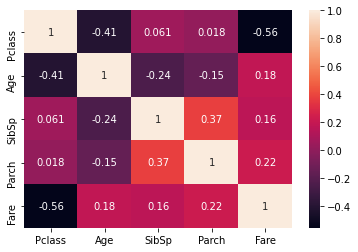

In [17]:
sns.heatmap(total.drop('PassengerId',axis=1).corr(),annot=True)

### NUMERICAL VALUES AGAISNT PASSENGER CLASS

E:\Installations\Anaconda\envs\tf-gpu-v0.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


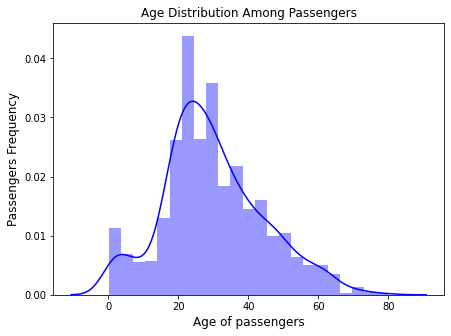

In [18]:
plt.figure(figsize=(7,5))
fig = sns.distplot(total['Age'], color='Blue')
fig.set_xlabel("Age of passengers",size=12)
fig.set_ylabel("Passengers Frequency",size=12)
plt.title('Age Distribution Among Passengers',size = 12)
plt.show()

Text(0.5, 1.0, 'Top 150 Fare Distribution Among Passengers Classes')

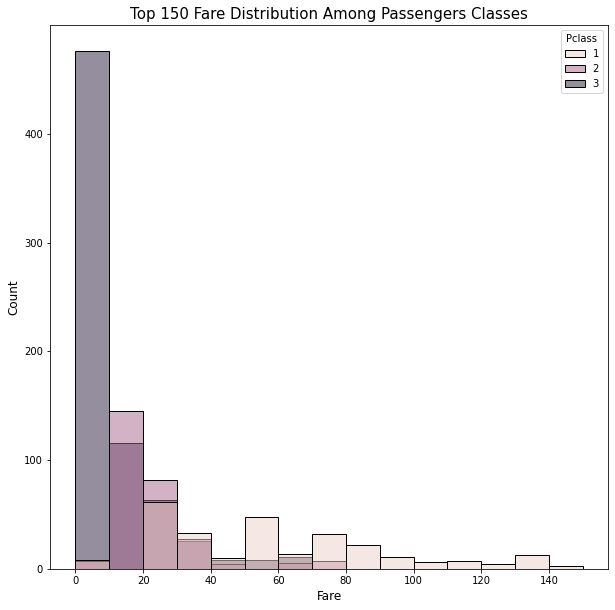

In [19]:
plt.figure(figsize=(10,10))
fig = sns.histplot(data= total[total['Fare']<=150], x='Fare', hue='Pclass', binwidth=10)
fig.set_xlabel("Fare",size=12)
fig.set_ylabel("Count",size=12)
plt.title('Top 150 Fare Distribution Among Passengers Classes', size = 15)

Text(0.5, 1.0, 'Age Distribution Among Passengers Classes')

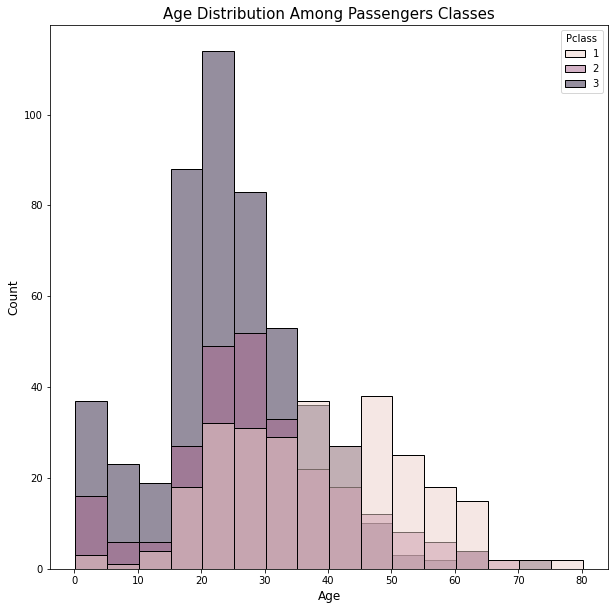

In [20]:
plt.figure(figsize=(10,10))
fig = sns.histplot(data= total, x='Age', hue='Pclass', binwidth=5)
fig.set_xlabel("Age",size=12)
fig.set_ylabel("Count",size=12)
plt.title('Age Distribution Among Passengers Classes', size = 15)

### NUMERICAL VALUES AGAINST GENDER

Text(0.5, 1.0, 'Top 150 Fare Distribution Among Gender')

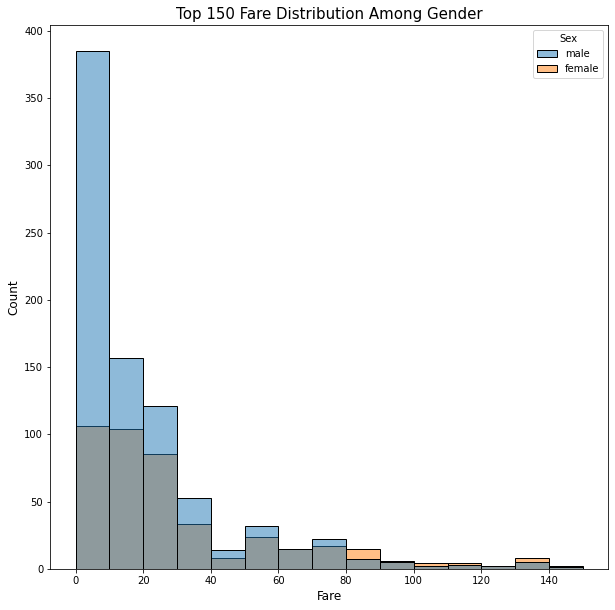

In [21]:
plt.figure(figsize=(10,10))
fig = sns.histplot(data= total[total['Fare']<=150], x='Fare', hue='Sex', binwidth=10)
fig.set_xlabel("Fare",size=12)
fig.set_ylabel("Count",size=12)
plt.title('Top 150 Fare Distribution Among Gender', size = 15)

Text(0.5, 1.0, 'Age Distribution Among Passengers Classes')

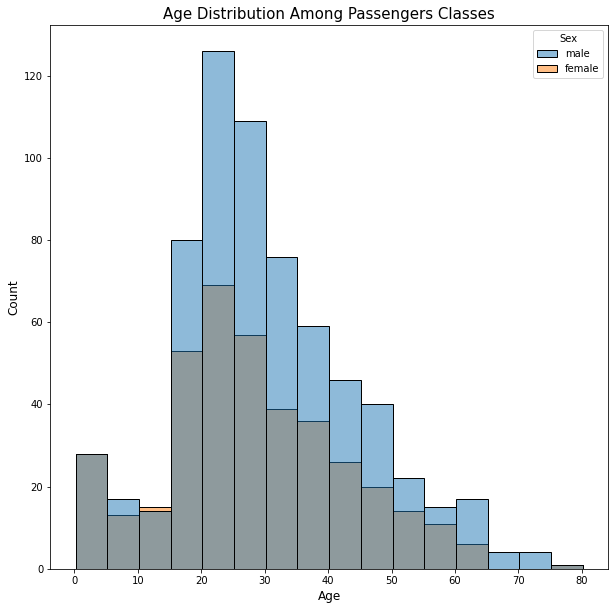

In [22]:
plt.figure(figsize=(10,10))
fig = sns.histplot(data= total, x='Age', hue='Sex', binwidth=5)
fig.set_xlabel("Age",size=12)
fig.set_ylabel("Count",size=12)
plt.title('Age Distribution Among Passengers Classes', size = 15)

### COLUMN VALUES DISTRIBUTION

In [23]:
def column_percent_value(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [24]:
column_percent_value(total, 'Sex')

,Total,Percent
male,843,64.4
female,466,35.6


In [25]:
column_percent_value(total, 'Pclass')

,Total,Percent
3,709,54.16
1,323,24.68
2,277,21.16


In [26]:
column_percent_value(total, 'Embarked')

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


### CATEGORICAL VALUES AGAINST SURVIVAL

<AxesSubplot:xlabel='Survived', ylabel='count'>

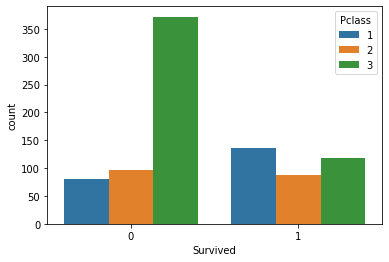

In [27]:
sns.countplot(x="Survived", hue="Pclass", data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

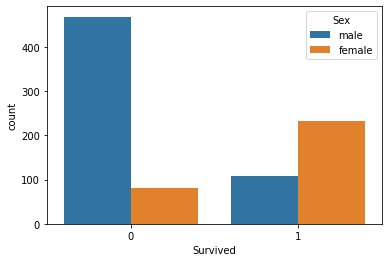

In [28]:
sns.countplot(x="Survived", hue="Sex", data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

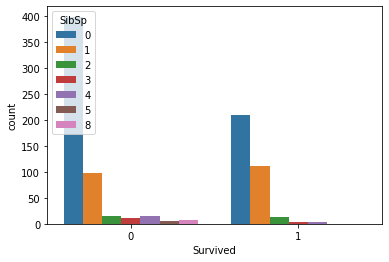

In [29]:
sns.countplot(x="Survived", hue='SibSp', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

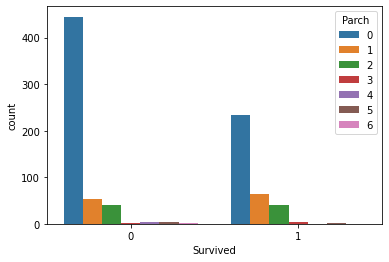

In [30]:
sns.countplot(x="Survived", hue='Parch', data=train_data)

## INFERENCE FROM ABOVE VISUALIZATION:
<ul>
<li>High chance of survival for passenegers with family.</li>
<li>High chance of survival if passenger is female</li>
<li>Survival rate of class 3 is lower when compared to other 2</li>
<li>Many youngsters belong to class 3</li>
</ul>

## FEATURE ENGINEERING

> Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

In [31]:
def simplify_age(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 48, 'Age'] = 4   
    return df

def simplify_fare(df):
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31.0), 'Fare'] = 2
    df.loc[df['Fare'] > 31.0, 'Fare'] = 3    
    return df

def format_name(df):
    df['Title'] =df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] =df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] =df['Title'].replace('Mlle', 'Miss')
    df['Title'] =df['Title'].replace('Ms', 'Miss')
    df['Title'] =df['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 2, "Master": 3, "Rare": 4}
    df['Title'] =df['Title'].map(title_mapping)
    df['Title'] =df['Title'].fillna(0)
    return df

def simplify_embarked(df):
    df['Embarked'].fillna(('S'), inplace=True)
    return df

## FAMILY FUNCTIONS
def func(x):
    if x[0]>0 or x[1]>0:
        return True
    else:
        return False

def simplify_family(df):
    df['WithFamily']=df[['SibSp','Parch']].apply(func, axis=1)
    df.drop(columns=['SibSp','Parch'],inplace=True)
    return df
    
    
def drop_columns(df):
    df.drop(columns=['Name', 'Ticket'], inplace=True)
    return df
    

In [32]:
total = simplify_age(total)

In [33]:
total = simplify_embarked(total)

In [34]:
total = simplify_family(total)

In [35]:
total = simplify_embarked(total)

In [36]:
total = format_name(total)

In [37]:
total = drop_columns(total)

### ONE HOT ENCODING

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
total['WithFamily'] = encoder.fit_transform(total['WithFamily'])
total['Sex'] = encoder.fit_transform(total['Sex'])
total['Embarked'] = encoder.fit_transform(total['Embarked'])

total = pd.get_dummies(total, columns=['Sex','Embarked','WithFamily'], drop_first=True)

In [39]:
total.describe()

,PassengerId,Pclass,Age,Fare,Title,Sex_1,Embarked_1,Embarked_2,WithFamily_1
count,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,1.294882,33.295479,1.512605,0.644003,0.093965,0.699771,0.396486
std,378.020061,0.837836,0.796675,51.758668,0.690168,0.478997,0.291891,0.458533,0.489354
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,1.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,3.000000,1.000000,14.454200,1.000000,1.000000,0.000000,1.000000,0.000000
75%,982.000000,3.000000,2.000000,31.275000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1309.000000,3.000000,4.000000,512.329200,4.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
total.head()

,PassengerId,Pclass,Age,Fare,Title,Sex_1,Embarked_1,Embarked_2,WithFamily_1
0,1,3,1.0,7.2500,1,1,0,1,1
1,2,1,2.0,71.2833,2,0,0,0,1
2,3,3,1.0,7.9250,2,0,0,1,0
3,4,1,2.0,53.1000,2,0,0,1,1
4,5,3,2.0,8.0500,1,1,0,1,0


### SPLITING THE DATA INTO TRAIN AND TEST

In [41]:
train_data = total[:len(train_data)]
train_data.shape

(891, 9)

In [44]:
test_data = total[len(test_data):]
print(test_data.shape)

(418, 9)


In [45]:
train_data.head()

,PassengerId,Pclass,Age,Fare,Title,Sex_1,Embarked_1,Embarked_2,WithFamily_1
0,1,3,1.0,7.2500,1,1,0,1,1
1,2,1,2.0,71.2833,2,0,0,0,1
2,3,3,1.0,7.9250,2,0,0,1,0
3,4,1,2.0,53.1000,2,0,0,1,1
4,5,3,2.0,8.0500,1,1,0,1,0


In [46]:
test_data.head()

,PassengerId,Pclass,Age,Fare,Title,Sex_1,Embarked_1,Embarked_2,WithFamily_1
0,892,3,2.0,7.8292,1,1,1,0,0
1,893,3,2.0,7.0000,2,0,0,1,1
2,894,2,3.0,9.6875,1,1,1,0,0
3,895,3,1.0,8.6625,1,1,0,1,0
4,896,3,1.0,12.2875,2,0,0,1,1


## TRAINING MODEL - XG Boost Classifier

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size = 0.2, random_state =0)

In [48]:
classifier = XGBClassifier(colsample_bylevel= 0.9,
#                     learning_rate= 0.001,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 10,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 1)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

E:\Installations\Anaconda\envs\tf-gpu-v0.1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8435754189944135

In [49]:
predict = classifier.predict(test_data).astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': predict})
output.to_csv('submission_v9.csv', index=False)

# KAGGLE SUBMISSION

## INITIAL SUBMISSION SCORE
<img src="https://i.imgur.com/9Wrrpqy.png">

## CONTRIBUTION SUBMISSION SCORE
<img src="https://i.imgur.com/HmjIlu0.png">